# Stacking

first set of base models will be trained.the predicted values will be the set of new features for second model( meta model ).

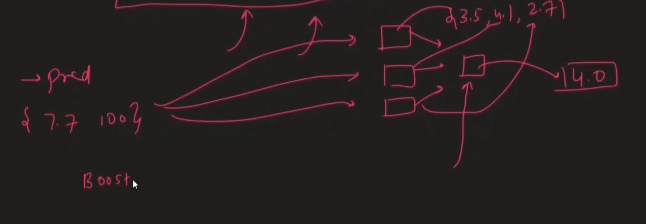

# Overfitting

Stacking is vernerable to stacking.

**Hold out method(Blending):** We devide the training dataset into two parts(training and validation),we train the base models using training dataset.

we then use the validation data into the base models and the corresponding predictions will be fed into the metamodel.


**K-fold method(Stacking):**(we divide the training data into k sets) we train our every base model with k-1 sets of data, k times. each time set which is not used to train is fed and the predictions are recorded.

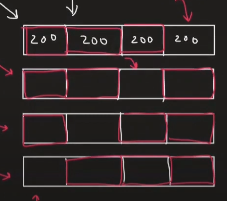

We do the same method for all the base models. 

we take the predictions from all the base models and make a metamodel out of randomforrestregressor.

**We have the trained metamodel, but the basemodels will not be the multiple sets, we take all the train data and feed into base models and use them as the base models whose predictions is fed into trained metamodel**

In [4]:
from sklearn.ensemble import StackingClassifier,StackingRegressor,RandomForestClassifier
import numpy as np
import pandas as pd
df=pd.read_csv(r'C:\Users\ASUS\Desktop\Ma_ler\Dsets\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
x=df.drop(columns=['target'])
y=df['target']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
estimators=[
    ('rf',RandomForestClassifier(n_estimators=10,random_state=42)),
    ('knn',KNeighborsClassifier(n_neighbors=10)),
    ('gbdt',GradientBoostingClassifier())
]
clf=StackingClassifier(estimators=estimators,final_estimator=LogisticRegression(),cv=10)

In [8]:
clf.fit(x_train,y_train)

StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('gbdt', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [10]:
res=clf.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,res))
confusion_matrix(y_test,res)

0.8688524590163934


array([[16,  8],
       [ 0, 37]], dtype=int64)